# AguaClara in Colombia
## Team LFEM
### Fletcher Chapin, Lilly Mendoza, Erica Marroquin

## Introduction
We created a draft design for an AguaClara water treatment plant in Santa Rosalía, Colombia. To create the design we obtained the input parameters from Alejandra, our contact and a student of Javeriana University in Bogotá, Colombia. We were able to work together to estimate parameters and propose a design draft for a potential plant.

![Map Showing Rosalia](ColombiaMap.png)

### Current Situation
Santa Rosalía is located in northern Colombia, in La Zona Bananera, named that due to the regions large dependence on banana farming. “La Zona” relies heavily on agriculture; it is the world's 4th largest producer of palm oil. This supplies many inhabitants with jobs directly or indirectly related to the palm and banana businesses. 

La Zona has water infrastructure designed specifically for agriculture. There are community aqueducts controlled by the municipalities, which tend to favor large plantation landowners rather than the local community members. There is abundant water in the region, coming from the mountains of Sierra Nevada de Santa Maria, but families rarely get access to any clean and safe drinking water. Their rivers are starting to run dry due to the large water consumption by the agricultural business. Adding to the issue, in 2011, the water from wells in La Zona was deemed unfit for consumption, as there was cross contamination with fecal matter and, in general, the water had a high salinity. According to the documentary, Agua Sala$^3$, less than 30% of rural communities in Colombia have access to potable water. Many community members spoke in Agua Sala$^3$ about the need for drinking water for the safety of their children, their everyday life, and their sense of community. 

In a hard fight by the community, Santa Rosalía was one of the first places in La Zona to receive water from a clean source. In 1999, a series of pipes were installed, bringing fresh water from a local river. This is known to be one of the best examples of a successful aqueduct system in Colombia. According to our source in Colombia, there has been an additional treatment system added; we believe it is a system of sand filters. The water is then brought to families via pumps, which have water meters to measure the water usage of each family. There are no water tariffs for the community. Unfortunately, the technology is too advanced for the town operators and there has been little education on the issue. This leads to the current plant only providing clean water for a few hours a day.

![Street View Rosalia](StreetView.png)


### Issues
- Lack of education on the issue with respect to the responsible use of water
- Those in charge of handling the filters and chlorination process do not have a well-founded knowledge about the use and the way in which the water treatment processes should be carried out
- There are no studies that allow them to know the quality of the water and see the quality difference between the water captured in the mountain and treated water
- The demand for water is not known
- Only can supply treated water for four hours a day due to storage capacity. For the other twenty hours, untreated water is supplied.


### Proposed Solution
- Increase the capacity of the storage tank.
- Estimate the demand for clean water extrapolating from current water usage data. 
- Obtain other design engine input parameters from Alejandra. If that’s not an option, than estimate based on reasonable assumptions.
- Using the AguaClara design engine, create a draft design for a plant in Santa Rosalía.
- Edit this draft to remove mistakes and make necessary tweaks.

According to Alejandra, the community would like to fit the plant on an existing concrete pad near Santa Rosalía. The community believes that this is a cheaper solution, as pouring additional concrete would be expensive. This pad is approximately 9 m by 8 m; one possibility is to adjust the draft created by the old AguaClara design engine in order to fit this area. We could possibly create a multi-story water treatment plant to minimize the area used by putting the flocculation and sedimentation system above the filters on another floor. If that is not an option, as AguaClara filters might not fit on a concrete slab, another alternative is to start from scratch. It could be possible to remove the concrete slab and build according to traditional AguaClara standards. 

In terms of how the plant will work, we believe that water can arrive via gravity and will not require pumping to reach the plant. Google Earth has very limited data on Santa Rosalía, making estimating the elevation very difficult, but as a rough estimation, the minimum elevation is around 130 ft and the highest is around 270 ft. Santa Rosalía is located right next to a mountain range, so it is possible to put the treatment plant 20 meters above the highest home. This would also get rid of the need to pump water after the plant, as there will most likely be enough head to drive the treated water to homes. The elevation of 350 ft would be less than a quarter of a mile from the highest home. The distance between the lowest elevation home and the plant would be about 0.65 miles, or 1.05 km. Santa Rosalía is a very small town with an area of only approximately 0.35 km$^2$.

![Satellite Rosalia](SatelliteImage.PNG)

## Estimating Design Constraints

### Flow Rate
When using the usual AguaClara approximation that each person uses 3 mL/s and the current population of Santa Rosalia of 4138$^{1}$ people, the approximate flow rate is 12.4 L/s. The current plant has a flow rate of 14 L/s and an increase in capacity is desired - therefore a bigger flow rate needs to be used for the design.

Using the code below, the future population for Santa Rosalia can be estimated. From the line of best fit a growth rate of 79 people/year was estimated. To be conservative and to account for future growth, we will use the future population for 25 years from now when calculating the design flow rate. Projected twenty five ahead, the population will be around 6200 people. 

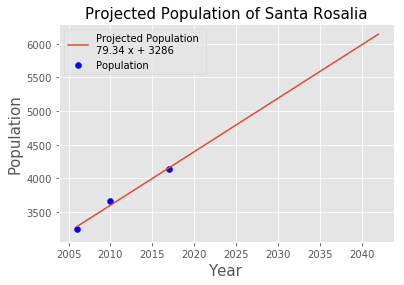

In [1]:
# import aide_design
from aide_design.play import*

# Obtain population projection from a line of best fit
pop = [3250,3659,4138]
time = [0,4,11,16,21,26,31,36]
year = [2006,2010,2017,2022,2027,2032,2037,2042]

best_fit = np.poly1d(np.polyfit(time[0:3],pop,1))
est_pop = best_fit(time)

plt.plot(year,est_pop)
plt.scatter(year[0:3],pop,color='blue')
plt.xlabel('Year',size=15)
plt.ylabel('Population',size=15)
plt.title('Projected Population of Santa Rosalia',size=15)
plt.legend(['Projected Population'+str(best_fit),'Population'])
plt.show()

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(7.5, 5)

In [2]:
# Estimate flow rate from the 25 year population projection

# first estimate from the current flow rate and population
current_flow = 14*u.L/u.s
flow_per_person = current_flow/pop[2]
est_flow = flow_per_person*est_pop

# second estimate from the Colombian standard of 150 L/day
flow_standard = 150*u.L/u.day
est_flow_standard = flow_standard*est_pop

print('Using the 25 year population estimate and the current flow rate, the design flow rate is',est_flow[-1])
print('Using the 25 year population estimate and the Colombian standard, the design flow rate is',est_flow_standard[-1].to(u.L/u.s))

Using the 25 year population estimate and the current flow rate, the design flow rate is 20.78 liter / second
Using the 25 year population estimate and the Colombian standard, the design flow rate is 10.66 liter / second


With the current flow rate of 14 L/s for 4138 people, that leads to a flow rate of 3.38 mL/s/person. Using 3.38 mL/s/person and the future population of 6200 people, the resulting flow rate is 20.78 L/s.

### Building Codes and Wall Thickness
There was a thought that the typical AguaClara building practice of using bricks, rebar, and mortar to assemble the walls of the "skeleton" of the plant (sedimentation tanks, flocculator, etc.). Upon speaking with Alejandra, it was learned that the water storage tanks are built using bricks and mortar - thus, leading us to believe that traditional AguaClara practices would fit Colombian building codes. 

Another input needed for the design engine was wall thickness of the skeleton. We made the assumption of 15 cm, due to this being the usual wall thickness for AguaClara plants.

## Storage Tank

Due to the storage capacity, the current Santa Rosalia plant can only provide treated water for four hours a day. The tank is 10,000 L. According to the Title B$^2$ Colombian Drinking Water Regulations, a water storage tank needs to be 1/3 of minimum daily water usage. Also using Title B, the assumption is that each person uses 150 L/day. Daily water usage, using the current population of 4138, would be 620,700 L/day. A third of this is 206,900 L/day. This storage tank is far too small for the current population. This is an issue that will need to be addressed - using the expected future population, the storage tank would need to have a capacity of 310,000 L. The derivation of these calculations is below.

In [6]:
# Storage tank calculations

# check if the current storage tank capacity is sufficient
storage_current = est_flow[2].to(u.L/u.day)/3*u.day
print('The current storage tank should have a capacity of '+ut.sig(storage_current,6))

# first estimate from the flow rate projection based on current flow rate
storage_flow = est_flow[-1].to(u.L/u.day)/3*u.day

# next estimate from the flow rate projection based on Colombian standards
storage_standard = est_flow_standard[-1].to(u.L/u.day)/3*u.day

print('Using the estimate of flow rate based on current flow rate to calculate storage the capacity ' \
      +'of the tank in 25 years should be '+ut.sig(storage_flow,6))
print('Using the estimate of flow rate based on the Colombian standard of 150 L/day to calculate storage the ' \
      +'capacity of the tank in 25 years should be '+ut.sig(storage_standard,6))
(current_flow*4*u.hr).to(u.L)

The current storage tank should have a capacity of 405184 l
Using the estimate of flow rate based on current flow rate to calculate storage the capacity of the tank in 25 years should be 598450 l
Using the estimate of flow rate based on the Colombian standard of 150 L/day to calculate storage the capacity of the tank in 25 years should be 307092 l


<Quantity(201600.0, 'liter')>

## Cost Estimate
Below are the Python calculations for a rough cost estimate based on the CEE 4540 class notes. Amortizing the capital costs over 25 years, the desired lifetime of the plant, we arrived at a yearly cost of $\$$39359. This is $\$$6.41 per person per year.

In [4]:
# cost estimate per year based on capital costs amortized over 30 years as well as yearly operating cost
capital_cost = 50000*u.USD + 8000*u.USD/(u.L/u.s)*est_flow[-1]
operating_cost = 5*u.USD*est_pop[-1]/u.year

total_cost = capital_cost/(25*u.year) + operating_cost
cost_per_person = total_cost/est_pop[-1]

print("The cost per year would be "+ut.sig(total_cost,5))
print("And per person this would be "+ut.sig(cost_per_person,3))

The cost per year would be 39359 USD/year
And per person this would be 6.41 USD/year


## First Iteration of Draft Design

This iteration was done using a wall thickness of 11 cm and 14 L/s flow rate.

![Draft Design 1](DraftDesign1.png)


## Second Iteration of Draft Design

For our second iteration, we decided on using a wall thickness of 15 cm and a flow rate of 20.78 L/s. 

![Draft Design 2](DraftDesign2.PNG)

Included are the inputs to the design engine.

![Draft Design 2 Inputs](DraftInputs.PNG)

## Future Steps
The team will look into outside funding sources - an option that was introduced was a "Crowdfunding" campaign. Additioanlly, an NGO similar to Agua Para el Pueblo will need to be contacted to see the feasibility of increasing the size of the storage tank. The NGO would also need to oversee construction and workers of the plant and 

If possible, we would like to monitor water quality using the AguaClara Plant Operations Smartphone Application (POST), but we are unsure of the installation process. This would help us understand how an AguaClara plant would perform.

## Sources
1. https://www.citypopulation.de/php/colombia-admin.php?adm2id=99624
1. http://www.minvivienda.gov.co/viceministerios/viceministerio-de-agua/reglamento-tecnico-del-sector/reglamento-tecnico-del-sector-de-agua-potable
1. https://www.youtube.com/watch?v=a-J9RbO0820